In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

***Read the file***

In [144]:
df = pd.read_csv("export2.csv", sep=",")

C:\Users\tomis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


***Check for data types of all columns***

In [145]:
df.dtypes

PlanId                         object
BusinessYear                    int64
BenefitName                    object
CoinsInnTier1                 float64
CopayOutofNet                  object
IsCovered                      object
IsStateMandate                 object
LimitQty                      float64
LimitUnit                      object
MinimumStay                   float64
StateCode                      object
Age                            object
Tobacco                        object
AvgOfIndividualRate           float64
AvgOfIndividualTobaccoRate    float64
AvgOfCouple                   float64
dtype: object

**Find out all missing values**

In [146]:
df.isna().sum()

PlanId                               0
BusinessYear                         0
BenefitName                          0
CoinsInnTier1                  2773336
CopayOutofNet                  2773382
IsCovered                       579394
IsStateMandate                 9244272
LimitQty                       9475040
LimitUnit                      9475040
MinimumStay                   10643960
StateCode                            0
Age                                  0
Tobacco                              0
AvgOfIndividualRate                  0
AvgOfIndividualTobaccoRate     1924614
AvgOfCouple                   10676692
dtype: int64

In [147]:
df.head()

,PlanId,BusinessYear,BenefitName,CoinsInnTier1,CopayOutofNet,IsCovered,IsStateMandate,LimitQty,LimitUnit,MinimumStay,StateCode,Age,Tobacco,AvgOfIndividualRate,AvgOfIndividualTobaccoRate,AvgOfCouple
0,26904AR0020004,2014,Dental Check-Up for Children,0.0,0,Covered,NaN,2.0,Visit(s) per Year,NaN,AR,Family Option,No Preference,36.36,NaN,72.72
1,26904AR0020004,2014,Basic Dental Care - Child,0.2,0,Covered,NaN,NaN,NaN,NaN,AR,Family Option,No Preference,36.36,NaN,72.72
2,26904AR0020004,2014,Orthodontia - Child,0.5,0,Covered,NaN,1.0,Treatment(s) per Lifetime,NaN,AR,Family Option,No Preference,36.36,NaN,72.72
3,26904AR0020004,2014,Major Dental Care - Child,0.5,0,Covered,NaN,NaN,NaN,NaN,AR,Family Option,No Preference,36.36,NaN,72.72
4,26904AR0020004,2014,Basic Dental Care - Adult,0.3,0,Covered,NaN,NaN,NaN,NaN,AR,Family Option,No Preference,36.36,NaN,72.72


***Drop columns that not needed for further analysis***

In [148]:
df.drop(columns=["IsCovered","IsStateMandate","LimitUnit","MinimumStay"], inplace=True)

***Replace all missing values with median of the column***

In [149]:
df['CoinsInnTier1'] = df['CoinsInnTier1'].fillna(df['CoinsInnTier1'].median())

***Fix some format issues, replace them all and only keep numerical values***

In [150]:
df['CopayOutofNet'] = df['CopayOutofNet'].str.replace("$","")
df['CopayOutofNet'] = df['CopayOutofNet'].str.replace(" Copay per Day","")
df['CopayOutofNet'] = df['CopayOutofNet'].str.replace(" Copay per Stay","")
df['CopayOutofNet'] = df['CopayOutofNet'].str.replace(" Copay before deductible","")
df['CopayOutofNet'] = df['CopayOutofNet'].str.replace(" Copay after deductible","")

***Replace all missing values with median of the column***

In [151]:
df['CopayOutofNet'] = df['CopayOutofNet'].fillna(df['CopayOutofNet'].median())

***Convert to float***

In [152]:
df['CopayOutofNet'] = df['CopayOutofNet'].astype(float)

In [153]:
df['LimitQty'] = df['LimitQty'].fillna(df['LimitQty'].median())

***Making new columns for age, because it has string value there***

In [154]:

df['Age1'] = df['Age'].str.replace("0-20","0")
df['Age1'] = df['Age1'].str.replace("65 and over","0")
df['Age1'] = df['Age1'].str.replace("Family Option","0")
df['Age2']=df['Age'] =="0-20"
df['Age3']=df['Age']=="65 and over"
df['Age4'] = df["Age"] == "Family Option"

***Counting input columns unique values***

In [155]:
df["PlanId"].nunique()

1711

In [156]:
df["BenefitName"].nunique()

230

In [157]:
df["StateCode"].nunique()

13

In [158]:
df["StateCode"].value_counts()

IL    2057254
IA    1546734
MI    1361832
NE    1000628
ID     897536
AR     887330
KS     715832
NM     587170
MT     515576
ME     384966
OH     339526
DE     280584
NH     103538
Name: StateCode, dtype: int64

***Visualizations of the dataset***

<AxesSubplot:>

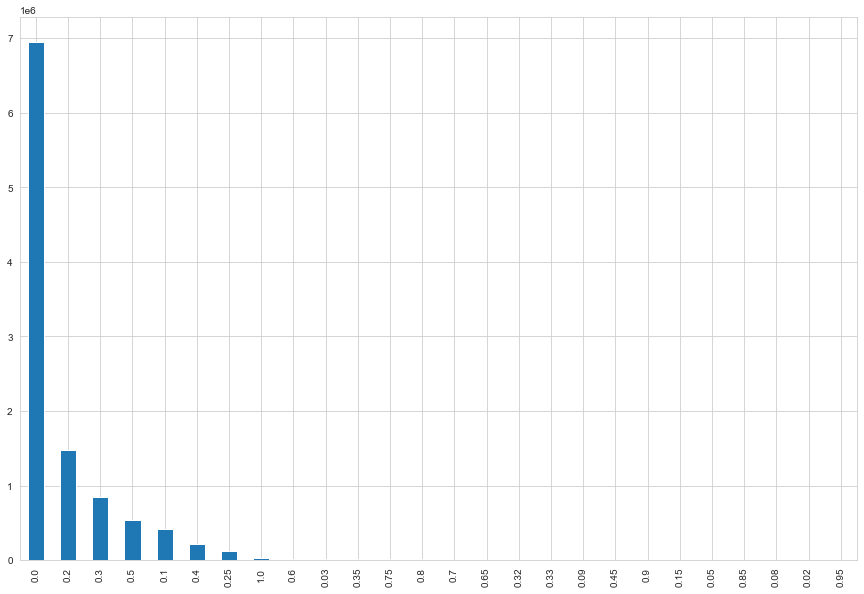

In [166]:
df['CoinsInnTier1'].value_counts().plot(kind='bar',figsize=(15, 10))

<AxesSubplot:>

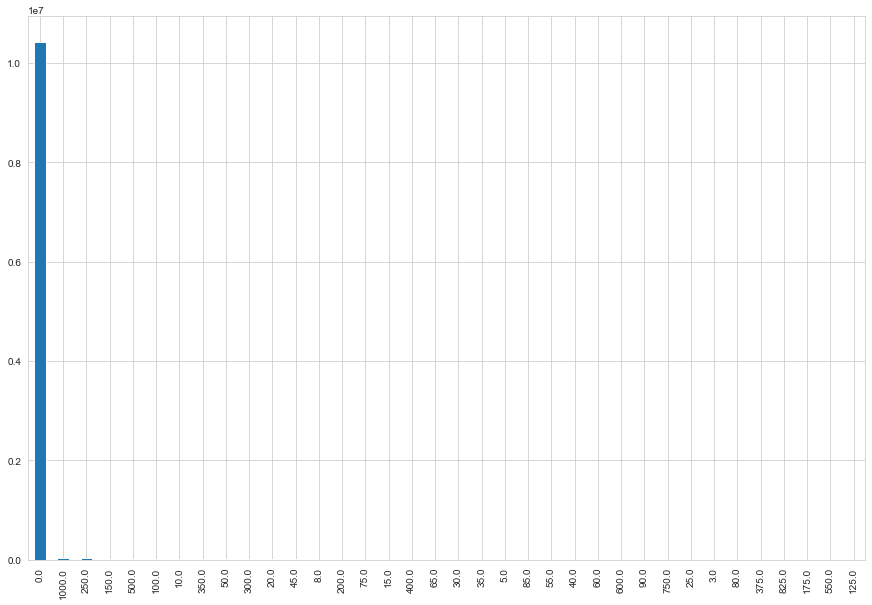

In [167]:
df['CopayOutofNet'].value_counts().plot(kind='bar',figsize=(15, 10))

<AxesSubplot:>

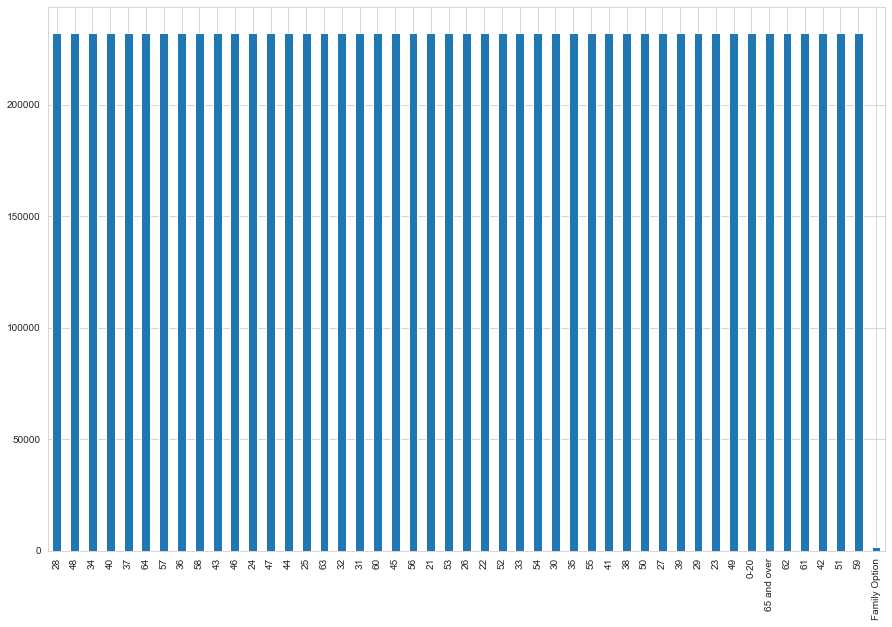

In [168]:
df['Age'].value_counts().plot(kind='bar',figsize=(15, 10))

<AxesSubplot:>

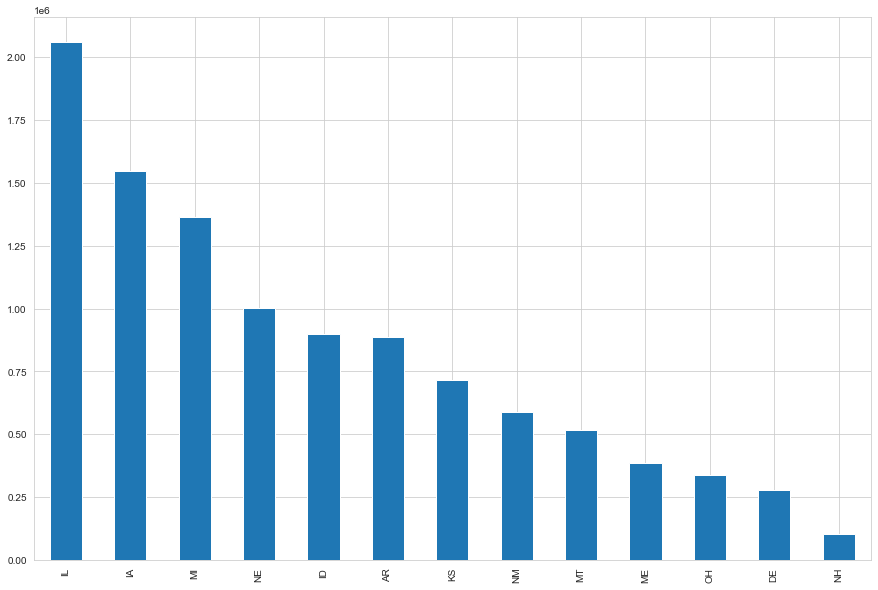

In [169]:
df['StateCode'].value_counts().plot(kind='bar',figsize=(15, 10))

In [163]:
df.isna().sum()

PlanId                               0
BusinessYear                         0
BenefitName                          0
CoinsInnTier1                        0
CopayOutofNet                        0
LimitQty                             0
StateCode                            0
Age                                  0
Tobacco                              0
AvgOfIndividualRate                  0
AvgOfIndividualTobaccoRate     1924614
AvgOfCouple                   10676692
Age1                                 0
Age2                                 0
Age3                                 0
Age4                                 0
dtype: int64